# NFL Project EDA
In this notebook we will import our datasets from various sources and conduct columnwise EDA on the dataframes.

In [23]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install nfl_data_py
import nfl_data_py as nfl
import pandas as pd
import seaborn as sns
import matplotlib as plt

## Data Scource information
Information regarding NFL package used to source data can be found here:
https://pypi.org/project/nfl-data-py/

In [7]:
# Creating play by play data
years = list(range(1999,2022))
pbp_df = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
# pbp_df.to_csv('play_by_play.csv')

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
Downcasting floats.


In [39]:
print(pbp_df.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098570 entries, 0 to 50711
Data columns (total 372 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    play_id                               float32
 1    game_id                               object 
 2    old_game_id                           object 
 3    home_team                             object 
 4    away_team                             object 
 5    season_type                           object 
 6    week                                  int32  
 7    posteam                               object 
 8    posteam_type                          object 
 9    defteam                               object 
 10   side_of_field                         object 
 11   yardline_100                          float32
 12   game_date                             object 
 13   quarter_seconds_remaining             float32
 14   half_seconds_remaining                float32
 15 

In [11]:
# Creating scoring line data
sc_line_df = nfl.import_sc_lines(years)
# sc_line_df.to_csv('scoring_lines.csv')
print(sc_line_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4092 entries, 0 to 4091
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     4092 non-null   int64  
 1   week       4092 non-null   int64  
 2   away_team  4092 non-null   object 
 3   home_team  4092 non-null   object 
 4   game_id    4092 non-null   int64  
 5   side       4092 non-null   object 
 6   line       4092 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 255.8+ KB
None


In [4]:
# Load in previous game data as it is better
games_df = pd.read_csv('http://www.habitatring.com/games.csv')
# games_df.to_csv('games_data.csv')
print(games_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           6137 non-null   object 
 1   season            6137 non-null   int64  
 2   game_type         6137 non-null   object 
 3   week              6137 non-null   int64  
 4   gameday           6137 non-null   object 
 5   weekday           6137 non-null   object 
 6   gametime          5878 non-null   object 
 7   away_team         6137 non-null   object 
 8   away_score        6137 non-null   int64  
 9   home_team         6137 non-null   object 
 10  home_score        6137 non-null   int64  
 11  location          6137 non-null   object 
 12  result            6137 non-null   int64  
 13  total             6137 non-null   int64  
 14  overtime          6137 non-null   int64  
 15  old_game_id       6137 non-null   int64  
 16  gsis              6111 non-null   float64


# Data Summary
So far we have 3 dataframes. 

Two dataframes from NFL_fast_data:
- pbp_df: Play by play data for every game from 1999 to 2022
- sc_lines_df: Each game keyed with game id and what the scoring line was. This data is less useful than habitatring data

One dataframe from habitatring:
- games_df: Has all of the information we could need as far as sportsbook info and nfl game info in each entry.

# EDA:
From here down we will start EDA.

## games_df EDA:

In [22]:
# # Analyze the columns with some but not all null vals.
col_space = games_df.columns
null_info_df = pd.DataFrame(index=col_space)
for column in col_space:
    null_count = games_df[column].isnull().sum()
    null_rate = games_df[column].isnull().mean()
    row_count = games_df[column].size
    null_info_df.at[column,'null_count'] = null_count
    null_info_df.at[column,'row_count'] = row_count
    null_info_df.at[column, 'null_rate'] = round(null_rate * 100,2)
    
null_info_df = null_info_df.sort_values(by=['null_rate'], axis=0, ascending=False)
null_info_df

,null_count,row_count,null_rate
nfl_detail_id,5865.0,6137.0,95.57
under_odds,1984.0,6137.0,32.33
over_odds,1984.0,6137.0,32.33
home_moneyline,1981.0,6137.0,32.28
away_moneyline,1981.0,6137.0,32.28
home_spread_odds,1981.0,6137.0,32.28
away_spread_odds,1981.0,6137.0,32.28
pff,1845.0,6137.0,30.06
wind,1772.0,6137.0,28.87
temp,1772.0,6137.0,28.87


So now we see that we have the line for all games, but not the odds. This will need to be considered when building a wager amount model. However we can still run classification/prediction on the entire dataset.

In [35]:
# Columnwise EDA function:

def column_eda(df, series_name):
    series = df[series_name]
    if df[series_name].dtypes == "object":
        s_mv = series.value_counts().idxmax()
        str_mv = f"Column median: {s_mv}\n"
        s_std = "n/a"
        s_min = "n/a"
        s_max = "n/a"
    else:
        s_mv = round(series.mean(),2)
        str_mv = f"Column mean: {s_mv}\n"
        s_std = round(series.std(), 2)
        s_min = series.min()
        s_max = series.max()
    s_count = series.count()

    null_rate = round(series.isnull().mean() * 100, 2)
    grouped = series.groupby(series).agg('count').sort_values(ascending = False).head(10)
    str_nr = f"Null rate: {null_rate}\n"
    
    str_std = f"Mean: {s_std}\n"
    str_count = f"Total obs: {s_count}\n"
    str_min = f"Column min: {s_min}\n"
    str_max = f"column max: {s_max}\n"
    
    print(f"{series_name}:\n")
    print(f"Data type: {series.dtype}\n")
    print(str_count)
    print(str_nr)
    print(str_mv)
    print(str_std)
    print(str_min)
    print(str_max)
    print(grouped)
    print("\n *********************************************************\n")
    
    # build df for report

# Columnwise EDA summary buildling dataframe and export to .csv ability.
def column_summary_df(df):
    col_space = df.columns
    col_info_df = pd.DataFrame(index = col_space)
    for column in col_space:
        if df[column].dtypes == "object":
            s_mv = df[column].value_counts().max()
            s_std = "n/a"
            s_min = "n/a"
            s_max = "n/a"
        else:
            s_mv = round(df[column].mean(),2)
            s_std = round(df[column].std(), 2)
            s_min = df[column].min()
            s_max = df[column].max()
        row_count = df[column].size
        null_count = df[column].isnull().sum()
        null_rate = df[column].isnull().mean()
        col_info_df.at[column,'obs_count'] = row_count
        col_info_df.at[column, 'mean_or_median'] = str(s_mv)
        col_info_df.at[column, 'std_dev'] = str(s_std)
        col_info_df.at[column,'min_val'] = str(s_min)
        col_info_df.at[column, 'max_val'] = str(s_max)
        col_info_df.at[column,'null_count'] = null_count
        col_info_df.at[column, 'null_rate'] = round(null_rate * 100,2)
    return col_info_df

## Column summary for games_df:

In [77]:
col_nums = games_df.shape[1]-1
col_indexes = list(range(0,col_nums))
for val in col_indexes:
    series_name = games_df.columns[val]
    column_eda(games_df, series_name)


game_id:

Data type: object

Total obs: 6137

Null rate: 0.0

Column median: 2020_18_LA_SEA

Mean: n/a

Column min: n/a

column max: n/a

game_id
1999_01_ARI_PHI    1
2014_08_BUF_NYJ    1
2014_08_PHI_ARI    1
2014_08_OAK_CLE    1
2014_08_MIN_TB     1
2014_08_MIA_JAX    1
2014_08_IND_PIT    1
2014_08_HOU_TEN    1
2014_08_GB_NO      1
2014_08_DET_ATL    1
Name: game_id, dtype: int64

 *********************************************************

season:

Data type: int64

Total obs: 6137

Null rate: 0.0

Column mean: 2010.07

Mean: 6.64

Column min: 1999

column max: 2021

season
2021    285
2020    269
2011    267
2019    267
2018    267
2017    267
2016    267
2015    267
2014    267
2013    267
Name: season, dtype: int64

 *********************************************************

game_type:

Data type: object

Total obs: 6137

Null rate: 0.0

Column median: REG

Mean: n/a

Column min: n/a

column max: n/a

game_type
REG    5880
WC       96
DIV      92
CON      46
SB       23
Name: game_

## Column Summary for pbp_df (play-by-play):

In [78]:
col_nums = pbp_df.shape
print(col_nums)
col_indexes = list(range(0,col_nums[1] - 1))
for val in col_indexes:
    series_name = pbp_df.columns[val]
    column_eda(pbp_df, series_name)

(1098570, 372)
play_id:

Data type: float32

Total obs: 1098570

Null rate: 0.0

Column mean: 2084.34

Mean: 1219.07

Column min: 1.0

column max: 5921.0

play_id
1.0      5619
36.0     2611
35.0     1724
57.0     1221
58.0     1177
78.0      794
79.0      767
99.0      571
51.0      528
100.0     485
Name: play_id, dtype: int64

 *********************************************************

game_id:

Data type: object

Total obs: 1098570

Null rate: 0.0

Column median: 2019_01_DET_ARI

Mean: n/a

Column min: n/a

column max: n/a

game_id
2019_01_DET_ARI    252
2019_16_CIN_MIA    248
2018_04_HOU_IND    241
2018_04_CLE_OAK    240
2006_15_TB_CHI     238
2013_12_DEN_NE     238
2017_04_SF_ARI     236
2013_12_MIN_GB     236
2020_07_SEA_ARI    234
2002_10_ATL_PIT    234
Name: game_id, dtype: int64

 *********************************************************

old_game_id:

Data type: object

Total obs: 1098570

Null rate: 0.0

Column median: 2019090809

Mean: n/a

Column min: n/a

column max: n/a


Column median: MID 50

Mean: n/a

Column min: n/a

column max: n/a

yrdln
MID 50    12707
NE 35      2293
CHI 35     2201
IND 30     2194
NE 30      2193
ARI 35     2191
GB 35      2188
BAL 35     2173
SEA 35     2158
PHI 30     2144
Name: yrdln, dtype: int64

 *********************************************************

ydstogo:

Data type: float32

Total obs: 1098570

Null rate: 0.0

Column mean: 7.14

Mean: 4.92

Column min: 0.0

column max: 50.0

ydstogo
10.0    415744
0.0     184365
1.0      48934
5.0      47445
7.0      46528
6.0      45492
8.0      44692
4.0      40289
9.0      38103
3.0      36826
Name: ydstogo, dtype: int64

 *********************************************************

ydsnet:

Data type: float32

Total obs: 1084489

Null rate: 1.28

Column mean: 38.73

Mean: 28.74

Column min: -39.0

column max: 99.0

ydsnet
 80.0    35733
 75.0    34428
 9.0     23339
 0.0     21713
 8.0     18461
 7.0     18018
 6.0     17676
 5.0     17472
 4.0     17137
-1.0     15882
Name: 

td_team:

Data type: object

Total obs: 30495

Null rate: 97.22

Column median: NE

Mean: n/a

Column min: n/a

column max: n/a

td_team
NE     1258
GB     1191
NO     1169
IND    1133
KC     1078
PHI    1061
SEA    1053
LAC    1048
PIT    1023
MIN    1018
Name: td_team, dtype: int64

 *********************************************************

td_player_name:

Data type: object

Total obs: 30495

Null rate: 97.22

Column median: C.Johnson

Mean: n/a

Column min: n/a

column max: n/a

td_player_name
C.Johnson       217
J.Jones         160
L.Tomlinson     152
A.Green         145
R.Williams      143
A.Peterson      140
A.Brown         137
T.Owens         132
R.Moss          131
L.Fitzgerald    131
Name: td_player_name, dtype: int64

 *********************************************************

td_player_id:

Data type: object

Total obs: 30494

Null rate: 97.22

Column median: 00-0020536

Mean: n/a

Column min: n/a

column max: n/a

td_player_id
00-0020536    169
00-0011754    148
00-001247

ep:

Data type: float32

Total obs: 1080727

Null rate: 1.62

Column mean: 1.69

Mean: 1.7

Column min: -3.803676128387451

column max: 6.593665599822998

ep
0.982039    7133
0.932427    6300
0.000000    4745
0.986227    3743
0.969361    2503
0.947000    2285
0.010358    2097
0.813618    2088
0.982825    1802
0.931429    1334
Name: ep, dtype: int64

 *********************************************************

epa:

Data type: float32

Total obs: 1080552

Null rate: 1.64

Column mean: -0.01

Mean: 1.26

Column min: -13.584858894348145

column max: 9.57986831665039

epa
-0.000000    99053
 0.017961     7007
 0.067573     5875
 0.013773     3645
 0.030639     2438
 0.017175     1772
 0.068571     1253
 0.051172     1166
 0.030624     1107
-0.947000     1029
Name: epa, dtype: int64

 *********************************************************

total_home_epa:

Data type: float32

Total obs: 1098570

Null rate: 0.0

Column mean: 0.25

Mean: 12.1

Column min: -63.41981506347656

column max: 65.

column max: 66.52721405029297

total_away_raw_yac_epa
 0.000000     15136
 14.591179       32
-2.972398        32
 13.822071       32
-6.270860        31
-24.698137       31
-17.127790       31
 5.929929        30
 2.988243        28
-8.814833        28
Name: total_away_raw_yac_epa, dtype: int64

 *********************************************************

wp:

Data type: float32

Total obs: 1092272

Null rate: 0.57

Column mean: 0.51

Mean: 0.3

Column min: 0.0

column max: 0.9999774098396301

wp
0.422024    5104
0.541853    4941
0.546262    2776
0.433208    2670
0.584447    1243
0.572573    1132
0.480118    1081
0.454899    1069
0.640445     821
0.632376     725
Name: wp, dtype: int64

 *********************************************************

def_wp:

Data type: float32

Total obs: 1092272

Null rate: 0.57

Column mean: 0.49

Mean: 0.3

Column min: 2.2601974706049077e-05

column max: 1.0

def_wp
0.577976    5104
0.458147    4941
0.453738    2776
0.566792    2670
0.415553    1243
0.4

total_home_comp_yac_wpa:

Data type: float32

Total obs: 770480

Null rate: 29.87

Column mean: -0.0

Mean: 0.23

Column min: -2.555464744567871

column max: 2.1069087982177734

total_home_comp_yac_wpa
 0.000000    23057
 0.026312      240
-0.021691      154
-0.039604      146
 0.042593      131
 0.011873      119
 0.010635      104
 0.044544      101
-0.005806       98
-0.075512       94
Name: total_home_comp_yac_wpa, dtype: int64

 *********************************************************

total_away_comp_yac_wpa:

Data type: float32

Total obs: 770480

Null rate: 29.87

Column mean: 0.0

Mean: 0.23

Column min: -2.1069087982177734

column max: 2.555464744567871

total_away_comp_yac_wpa
 0.000000    23057
-0.026312      240
 0.021691      154
 0.039604      146
-0.042593      131
-0.011873      119
-0.010635      104
-0.044544      101
 0.005806       98
 0.075512       94
Name: total_away_comp_yac_wpa, dtype: int64

 *********************************************************

total_h

Mean: 0.07

Column min: 0.0

column max: 1.0

fumble_not_forced
0.0    1042464
1.0       5581
Name: fumble_not_forced, dtype: int64

 *********************************************************

fumble_out_of_bounds:

Data type: float32

Total obs: 1048045

Null rate: 4.6

Column mean: 0.0

Mean: 0.04

Column min: 0.0

column max: 1.0

fumble_out_of_bounds
0.0    1046730
1.0       1315
Name: fumble_out_of_bounds, dtype: int64

 *********************************************************

solo_tackle:

Data type: float32

Total obs: 1048045

Null rate: 4.6

Column mean: 0.48

Mean: 0.5

Column min: 0.0

column max: 1.0

solo_tackle
0.0    548731
1.0    499314
Name: solo_tackle, dtype: int64

 *********************************************************

safety:

Data type: float32

Total obs: 1048045

Null rate: 4.6

Column mean: 0.0

Mean: 0.02

Column min: 0.0

column max: 1.0

safety
0.0    1047654
1.0        391
Name: safety, dtype: int64

 *************************************************

receiver_player_id:

Data type: object

Total obs: 383206

Null rate: 65.12

Column median: 00-0022921

Mean: n/a

Column min: n/a

column max: n/a

receiver_player_id
00-0022921    2197
00-0006101    1714
00-0020498    1657
00-0022084    1655
00-0022127    1651
00-0020337    1622
00-0022044    1613
00-0027793    1510
00-0024334    1493
00-0017162    1481
Name: receiver_player_id, dtype: int64

 *********************************************************

receiver_player_name:

Data type: object

Total obs: 383206

Null rate: 65.12

Column median: C.Johnson

Mean: n/a

Column min: n/a

column max: n/a

receiver_player_name
C.Johnson       2817
J.Jones         2478
L.Fitzgerald    2197
S.Smith         1977
D.Jackson       1960
A.Brown         1909
K.Johnson       1842
A.Green         1794
A.Johnson       1657
A.Boldin        1655
Name: receiver_player_name, dtype: int64

 *********************************************************

receiving_yards:

Data type: float32

Total obs: 254333

Nu

ValueError: attempt to get argmax of an empty sequence

# Conclusion:
It is clear with the sheer volume of data that we have, the next step is to pick one or two hypotheses we would like to test, and begin using domain knowledge and PFA to reduce our column count, particularly for the play-by-play data.

At this point we would like to test to predict touchdown scorers and total game score over/under.

# Additonal:

## Writing summary tables to csv for Report:

In [23]:
games_col_sum_df = column_summary_df(games_df)
print(games_col_sum_df)
games_col_sum_df.to_csv('games_col_sum.csv')

45
                  obs_count                        mean_or_median  \
game_id              6137.0                       2016_17_JAX_IND   
season               6137.0                               2010.07   
game_type            6137.0                                   REG   
week                 6137.0                                  9.53   
gameday              6137.0                            2010-01-03   
weekday              6137.0                                Sunday   
gametime             6137.0                                 13:00   
away_team            6137.0                                   BAL   
away_score           6137.0                                 20.89   
home_team            6137.0                                    NE   
home_score           6137.0                                 23.24   
location             6137.0                                  Home   
result               6137.0                                  2.35   
total                6137.0    

In [41]:
pbp_col_sum_df = column_summary_df(pbp_df)
pbp_col_sum_df.to_csv('pbp_col_sum.csv')
print(pbp_col_sum_df.head(5))

             obs_count mean_or_median  std_dev min_val max_val  null_count  \
play_id      1098570.0        2084.34  1219.07     1.0  5921.0         0.0   
game_id      1098570.0            252      n/a     n/a     n/a         0.0   
old_game_id  1098570.0            252      n/a     n/a     n/a         0.0   
home_team    1098570.0          38800      n/a     n/a     n/a         0.0   
away_team    1098570.0          36617      n/a     n/a     n/a         0.0   

             null_rate  
play_id            0.0  
game_id            0.0  
old_game_id        0.0  
home_team          0.0  
away_team          0.0  


In [10]:
games_df['total_minus_line'] = games_df['total'] - games_df['total_line']
# print(games_df['total_minus_line'].head())

0   -18.0
1    -1.0
2     6.0
3     9.0
4    -0.5
Name: total_minus_line, dtype: float64


Text(0, 0.5, 'Score')

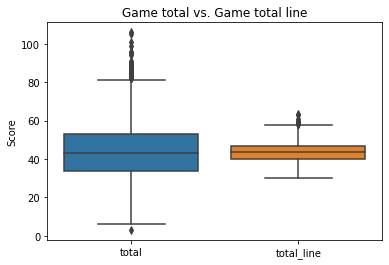

In [28]:
tot_vis_df = games_df[['total', 'total_line']]
plt = sns.boxplot(data=tot_vis_df)
plt.set_title('Game total vs. Game total line')
plt.set_ylabel('Score')

Text(0.5, 0, 'Total minus line')

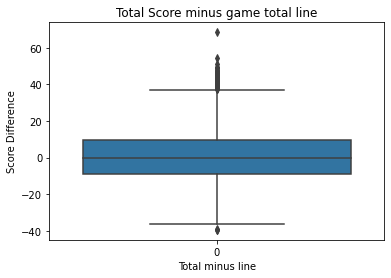

In [29]:
plt = sns.boxplot(data=games_df['total_minus_line'])
plt.set_title('Total Score minus game total line')
plt.set_ylabel('Score Difference')
plt.set_xlabel('Total minus line')